In [2]:
install.packages('class')
install.packages('gmodels')
install.packages('scales')

package 'class' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\15U560\AppData\Local\Temp\RtmpMldVvn\downloaded_packages


also installing the dependencies 'gtools', 'gdata'



package 'gtools' successfully unpacked and MD5 sums checked
package 'gdata' successfully unpacked and MD5 sums checked
package 'gmodels' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\15U560\AppData\Local\Temp\RtmpMldVvn\downloaded_packages
package 'scales' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\15U560\AppData\Local\Temp\RtmpMldVvn\downloaded_packages


In [1]:
library(class)
library(gmodels)
library(scales)

In [2]:
setwd('C:/Users/15U560/Desktop/week10_1')

In [3]:
iris <- read.csv('iris.csv')

In [4]:
set.seed(1)
N = nrow(iris)
tr.idx = sample(1:N, size = N*2/3, replace = FALSE)

In [6]:
?sample

In [5]:
iris.train <- iris[tr.idx, -5]
iris.test <- iris[-tr.idx, -5]
trainLabels <- iris[tr.idx, 5]
testLabels <- iris[-tr.idx, 5]

In [6]:
train <- iris[tr.idx,]
test <- iris[-tr.idx,]

In [7]:
md1 <- knn(train=iris.train, test=iris.test, cl=trainLabels, k=5)
md1
# md1에는 test 데이터(50개)들을 예측한 결과가 저장되어 있음

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     setosa     setosa     setosa    
[19] versicolor versicolor versicolor versicolor versicolor versicolor
[25] versicolor versicolor versicolor versicolor versicolor versicolor
[31] versicolor versicolor virginica  virginica  virginica  virginica 
[37] virginica  virginica  virginica  virginica  virginica  virginica 
[43] versicolor virginica  virginica  virginica  virginica  virginica 
[49] virginica  virginica 
Levels: setosa versicolor virginica

In [10]:
CrossTable(x=testLabels, y=md1, prop.chisq=FALSE)
# 정확도 : 49/50 = 98%
# 오분류율 : 1/50 = 2%
help(CrossTable)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  50 

 
             | md1 
  testLabels |     setosa | versicolor |  virginica |  Row Total | 
-------------|------------|------------|------------|------------|
      setosa |         18 |          0 |          0 |         18 | 
             |      1.000 |      0.000 |      0.000 |      0.360 | 
             |      1.000 |      0.000 |      0.000 |            | 
             |      0.360 |      0.000 |      0.000 |            | 
-------------|------------|------------|------------|------------|
  versicolor |          0 |         14 |          0 |         14 | 
             |      0.000 |      1.000 |      0.000 |      0.280 | 
             |      0.000 |      0.933 |      0.000 |            | 
             |      0.000 |      0.280 |      0.000 |            | 
------

In [8]:
# knn에서 최적 k 탐색
accuracy_k <- NULL
# 적합한 k를 찾기위한 
nnum <- nrow(iris.train)/2
for(kk in c(1:nnum))
    {
    set.seed(1234)
    knn_k <- knn(train=iris.train, test=iris.test, cl=trainLabels, k=kk)
    accuracy_k <- c(accuracy_k, sum(knn_k == testLabels)/length(testLabels))
}

In [9]:
accuracy_k

[1] 0.94 0.94 0.96 0.98 0.98 0.98 0.98 1.00 1.00 0.98 0.98 1.00 1.00 0.98 0.96
[16] 0.96 0.96 0.96 0.96 0.96 0.98 0.96 0.96 0.94 0.94 0.94 0.96 0.96 0.94 0.94
[31] 0.94 0.94 0.92 0.92 0.92 0.92 0.92 0.92 0.92 0.92 0.92 0.92 0.90 0.90 0.90
[46] 0.90 0.90 0.90 0.90 0.90

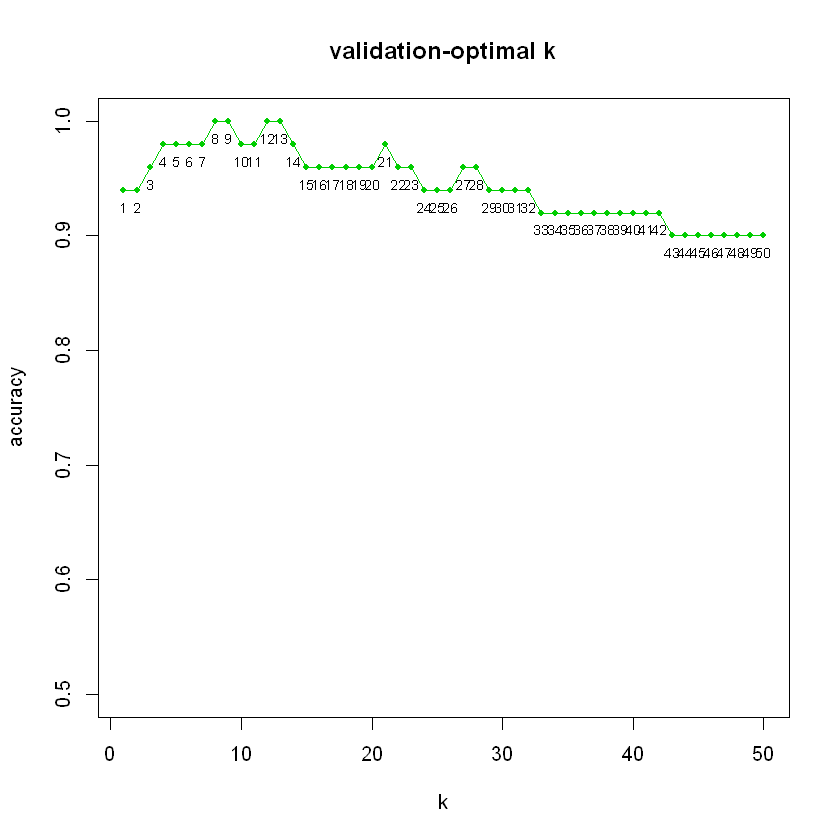

In [10]:
test_k <- data.frame(k=c(1:nnum), accuracy=accuracy_k[c(1:nnum)])
plot(formula=accuracy~k, data=test_k, type='o', ylim=c(0.5, 1), pch=20, col=3, main='validation-optimal k')
with(test_k, text(accuracy ~k, labels= k, pos=1, cex = 0.7))

In [14]:
?text

In [11]:
# minimum k for the highest accuracy
min(test_k[test_k$accuracy %in% max(accuracy_k), 'k'])

[1] 8

In [26]:
# 최종 knn 모형 k =8 
md1 = knn(train=iris.train, test = iris.test, cl= trainLabels, k=8)
CrossTable(x=testLabels, y=md1, prop.chisq=FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  50 

 
             | md1 
  testLabels |     setosa | versicolor |  virginica |  Row Total | 
-------------|------------|------------|------------|------------|
      setosa |         18 |          0 |          0 |         18 | 
             |      1.000 |      0.000 |      0.000 |      0.360 | 
             |      1.000 |      0.000 |      0.000 |            | 
             |      0.360 |      0.000 |      0.000 |            | 
-------------|------------|------------|------------|------------|
  versicolor |          0 |         14 |          0 |         14 | 
             |      0.000 |      1.000 |      0.000 |      0.280 | 
             |      0.000 |      1.000 |      0.000 |            | 
             |      0.000 |      0.280 |      0.000 |            | 
------

In [27]:
# 정확도 100% 오분류율 0% 라고 볼 수 있다. 

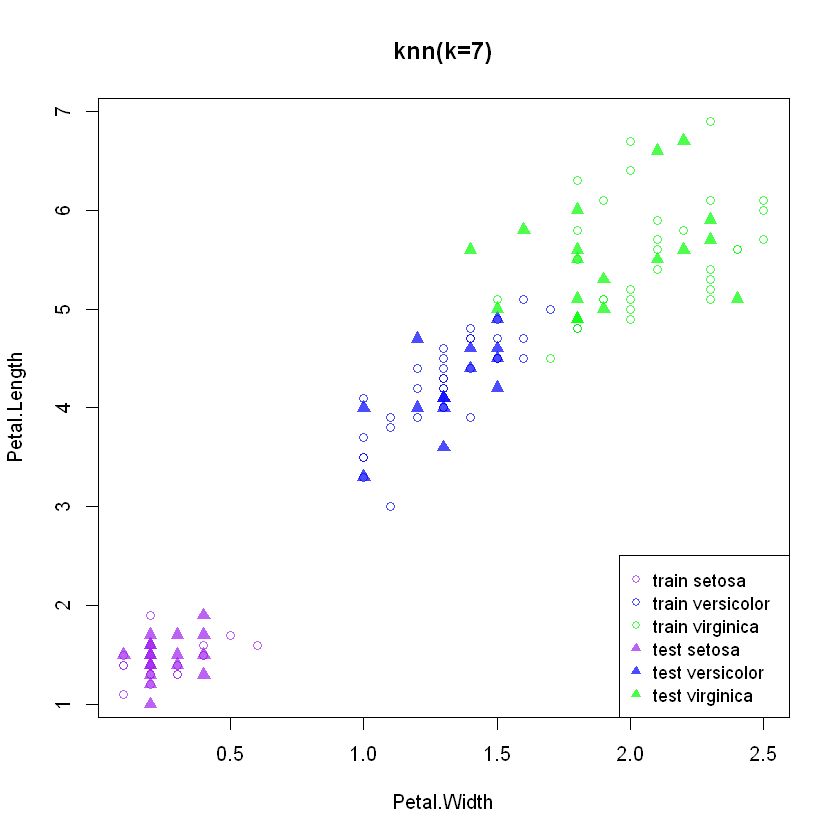

In [16]:
# graphic display
plot(formula=Petal.Length ~ Petal.Width, data = iris.train,
    col = alpha(c('purple', 'blue', 'green'), 0.7)[trainLabels],
    main = 'knn(k=7)')
points(formula = Petal.Length~ Petal.Width, data = iris.test,
      pch = 17, cex= 1.2, col= alpha(c('purple', 'blue', 'green'),0.7)[md1]
       )
legend('bottomright',
      c(paste('train', levels(trainLabels)),paste('test', levels(testLabels))),
      pch= c(rep(1, 3), rep(17, 3)),
      col= c(rep(alpha(c('purple', 'blue', 'green'), 0.7), 2)),
      cex = 0.9)

In [18]:
install.packages('kknn')

also installing the dependencies 'irlba', 'igraph'



package 'irlba' successfully unpacked and MD5 sums checked
package 'igraph' successfully unpacked and MD5 sums checked
package 'kknn' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\15U560\AppData\Local\Temp\Rtmpi2PRsi\downloaded_packages


In [19]:
# 거리에 따라 가중치를 부여하는 알고리즘
library(kknn)
?kknn

In [20]:
# k=5 일때
md2 <- kknn(Species~., train=train, test=iris.test, k=5, distance=1, kernel='triangular')
md2


Call:
kknn(formula = Species ~ ., train = train, test = iris.test,     k = 5, distance = 1, kernel = "triangular")

Response: "nominal"

In [21]:
md2_fit <- fitted(md2)
md2_fit

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     setosa     setosa     setosa    
[19] versicolor versicolor versicolor versicolor versicolor versicolor
[25] versicolor versicolor versicolor versicolor versicolor versicolor
[31] versicolor versicolor virginica  virginica  virginica  virginica 
[37] virginica  virginica  versicolor virginica  virginica  virginica 
[43] virginica  virginica  virginica  versicolor virginica  virginica 
[49] virginica  virginica 
Levels: setosa versicolor virginica

In [22]:
CrossTable(x=testLabels, y=md2_fit, prop.chisq=FALSE, prop.c=FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  50 

 
             | md2_fit 
  testLabels |     setosa | versicolor |  virginica |  Row Total | 
-------------|------------|------------|------------|------------|
      setosa |         18 |          0 |          0 |         18 | 
             |      1.000 |      0.000 |      0.000 |      0.360 | 
             |      0.360 |      0.000 |      0.000 |            | 
-------------|------------|------------|------------|------------|
  versicolor |          0 |         14 |          0 |         14 | 
             |      0.000 |      1.000 |      0.000 |      0.280 | 
             |      0.000 |      0.280 |      0.000 |            | 
-------------|------------|------------|------------|------------|
   virginica |          0 |          2 |         16 |         18 | 
             |      0.000 |    

In [23]:
# k=8 일때 
md3 <-kknn(Species~., train=train, test= iris.test, k=8, distance=2, kernel='triangular')
md3


Call:
kknn(formula = Species ~ ., train = train, test = iris.test,     k = 8, distance = 2, kernel = "triangular")

Response: "nominal"

In [24]:
md3_fit <- fitted(md3)
md3_fit

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     setosa     setosa     setosa    
[19] versicolor versicolor versicolor versicolor versicolor versicolor
[25] versicolor versicolor versicolor versicolor versicolor versicolor
[31] versicolor versicolor virginica  virginica  virginica  virginica 
[37] virginica  virginica  versicolor virginica  virginica  virginica 
[43] virginica  virginica  virginica  virginica  virginica  virginica 
[49] virginica  virginica 
Levels: setosa versicolor virginica

In [25]:
CrossTable(x=testLabels, y=md3_fit, prop.chisq=FALSE, prop.c=FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  50 

 
             | md3_fit 
  testLabels |     setosa | versicolor |  virginica |  Row Total | 
-------------|------------|------------|------------|------------|
      setosa |         18 |          0 |          0 |         18 | 
             |      1.000 |      0.000 |      0.000 |      0.360 | 
             |      0.360 |      0.000 |      0.000 |            | 
-------------|------------|------------|------------|------------|
  versicolor |          0 |         14 |          0 |         14 | 
             |      0.000 |      1.000 |      0.000 |      0.280 | 
             |      0.000 |      0.280 |      0.000 |            | 
-------------|------------|------------|------------|------------|
   virginica |          0 |          1 |         17 |         18 | 
             |      0.000 |    

In [28]:
# 정확도 98% 오분류율 2% 
# iris데이터라서 거리에 가중치를 준것과 주지 않은 것과 별 차이가 없는것으로 나왔는데 현장에서 복잡한 데이터들은 차이가 날 수 있으므로 두가지를 꼭 비교해보길 